
# CHRIST (Deemed to be University)
## Department of Computer Science


## 5MCA-A - Neural Networks and Deep Learning (MCA572)


---
  
### ETE III - LAB TEST


---

**Muskan Kumari Gupta [2347130]**

*04 Dec 2024*

---

## **Question 2 - CNN Autoencoder for Image Reconstruction**
 **Objective:** Develop and evaluate a Convolutional Neural Network (CNN) Autoencoder to reconstruct images from a given dataset.

***Step 1: Import the libraries***


In [ ]:
import numpy as np
import os
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow.keras.layers import Conv2D, Conv2DTranspose, Input, Reshape, Flatten, Dense
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.losses import MeanSquaredError
from tensorflow.keras.preprocessing.image import img_to_array, load_img


- Imported all the necessary libraries

***Step 2: Load and Preprocess the Dataset***

In [ ]:
# Function to load and preprocess images
def load_images(dataset_path, img_size=(128, 128)):
    images = []
    for img_file in os.listdir(dataset_path):
        img = load_img(os.path.join(dataset_path, img_file), target_size=img_size, color_mode="rgb")
        img_array = img_to_array(img) / 255.0  # Normalize to range [0, 1]
        images.append(img_array)
    return np.array(images)

# Load the dataset
dataset_path = "coil-20/coil-20-proc"
images = load_images(dataset_path)

# Split dataset into train and test sets
train_images, test_images = train_test_split(images, test_size=0.2, random_state=42)

print(f"Train images shape: {train_images.shape}")
print(f"Test images shape: {test_images.shape}")


Train images shape: (1152, 128, 128, 3)
Test images shape: (288, 128, 128, 3)


- The dataset is preprocessed correctly and divided into train and test subsets.
- Training images will be used to train the model, and test images will help evaluate its performance on unseen data.


***Step 3: Build the CNN Autoencoder***

In [ ]:
# Define the Autoencoder model
def build_autoencoder(input_shape):
    # Encoder
    input_layer = Input(shape=input_shape)
    x = Conv2D(32, (3, 3), activation='relu', padding='same')(input_layer)
    x = Conv2D(64, (3, 3), activation='relu', padding='same', strides=(2, 2))(x)
    x = Conv2D(128, (3, 3), activation='relu', padding='same', strides=(2, 2))(x)
    latent_space = Flatten()(x)

    # Decoder
    x = Reshape((input_shape[0] // 4, input_shape[1] // 4, 128))(latent_space)
    x = Conv2DTranspose(64, (3, 3), activation='relu', padding='same', strides=(2, 2))(x)
    x = Conv2DTranspose(32, (3, 3), activation='relu', padding='same', strides=(2, 2))(x)
    output_layer = Conv2D(3, (3, 3), activation='sigmoid', padding='same')(x)

    return Model(input_layer, output_layer)

input_shape = train_images.shape[1:]
autoencoder = build_autoencoder(input_shape)
autoencoder.summary()


Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)        │ (None, 128, 128, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d (Conv2D)                 │ (None, 128, 128, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 64, 64, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 32, 32, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 131072)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ reshape (Reshape)               │ (None, 32, 32, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_transpose                │ (None, 64, 64, 64)     │        73,792 │
│ (Conv2DTranspose)               │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_transpose_1              │ (None, 128, 128, 32)   │        18,464 │
│ (Conv2DTranspose)               │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 128, 128, 3)    │           867 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 186,371 (728.01 KB)

 Trainable params: 186,371 (728.01 KB)

 Non-trainable params: 0 (0.00 B)

This CNN Autoencoder compresses images (encoder) and reconstructs them (decoder).

**Key points:**

- Input Shape: (128, 128, 3) for RGB images.
- Latent Space: Compressed representation after encoding.
- Decoder: Expands latent space back to the original shape.

**Parameters:**

- Total trainable parameters: 186,371, efficiently small for this task.
- Architecture uses convolutional and transposed convolutional layers for feature extraction and reconstruction.

***Step 4: Compile and Train the Model***

Epoch 1/20
36/36 ━━━━━━━━━━━━━━━━━━━━ 12s 321ms/step - loss: 0.1270 - val_loss: 0.0139
Epoch 2/20
36/36 ━━━━━━━━━━━━━━━━━━━━ 12s 326ms/step - loss: 0.0099 - val_loss: 0.0038
Epoch 3/20
36/36 ━━━━━━━━━━━━━━━━━━━━ 12s 341ms/step - loss: 0.0035 - val_loss: 0.0023
Epoch 4/20
36/36 ━━━━━━━━━━━━━━━━━━━━ 12s 343ms/step - loss: 0.0023 - val_loss: 0.0021
Epoch 5/20
36/36 ━━━━━━━━━━━━━━━━━━━━ 13s 355ms/step - loss: 0.0020 - val_loss: 0.0015
Epoch 6/20
36/36 ━━━━━━━━━━━━━━━━━━━━ 14s 382ms/step - loss: 0.0017 - val_loss: 0.0014
Epoch 7/20
36/36 ━━━━━━━━━━━━━━━━━━━━ 13s 362ms/step - loss: 0.0015 - val_loss: 0.0013
Epoch 8/20
36/36 ━━━━━━━━━━━━━━━━━━━━ 14s 385ms/step - loss: 0.0014 - val_loss: 0.0012
Epoch 9/20
36/36 ━━━━━━━━━━━━━━━━━━━━ 13s 368ms/step - loss: 0.0013 - val_loss: 0.0017
Epoch 10/20
36/36 ━━━━━━━━━━━━━━━━━━━━ 13s 363ms/step - loss: 0.0018 - val_loss: 0.0010
Epoch 11/20
36/36 ━━━━━━━━━━━━━━━━━━━━ 14s 375ms/step - loss: 0.0010 - val_loss: 8.7154e-04
Epoch 12/20
36/36 ━━━━━━━━━━━━━━━━━━━

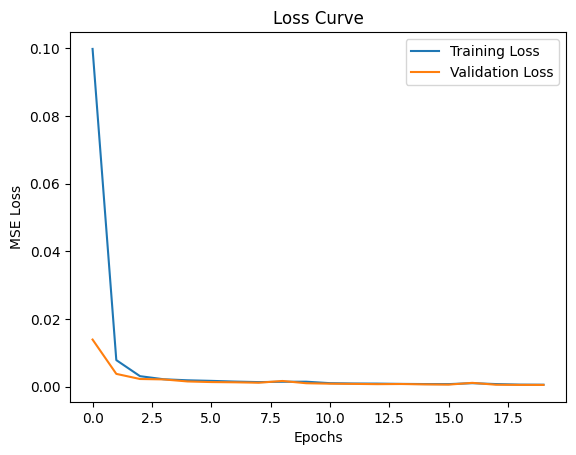

In [ ]:
# Compile the model
autoencoder.compile(optimizer=Adam(learning_rate=0.001), loss=MeanSquaredError())

# Train the model
history = autoencoder.fit(
    train_images, train_images,
    validation_data=(test_images, test_images),
    epochs=20,
    batch_size=32,
    verbose=1
)

# Plot the loss curve
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Loss Curve')
plt.xlabel('Epochs')
plt.ylabel('MSE Loss')
plt.legend()
plt.show()


**Training Summary:**
- Loss Function: The model uses Mean Squared Error (MSE) for both training and validation.
- Optimizer: Adam optimizer with a learning rate of 0.001.
Epochs: The model was trained for 20 epochs.

**Loss Reduction:**
- Initial Epochs: Significant reduction in both training and validation losses, indicating effective learning.
- Later Epochs: Losses plateau, showing convergence.
By the 20th epoch:
  - Training Loss: ~0.00057
  - Validation Loss: ~0.00050

**Loss Curve Insights:**

- The training and validation losses are closely aligned, indicating no overfitting.
- Both losses continuously decrease, which reflects the model's capability to reconstruct images effectively.

**Key Takeaways:**
- The autoencoder successfully learned to reconstruct images with very low reconstruction errors (both training and validation). This is evident from the steadily declining MSE and the smooth loss curve.

9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 92ms/step - loss: 5.1764e-04
Final Test MSE: 0.0005055715446360409
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 93ms/step


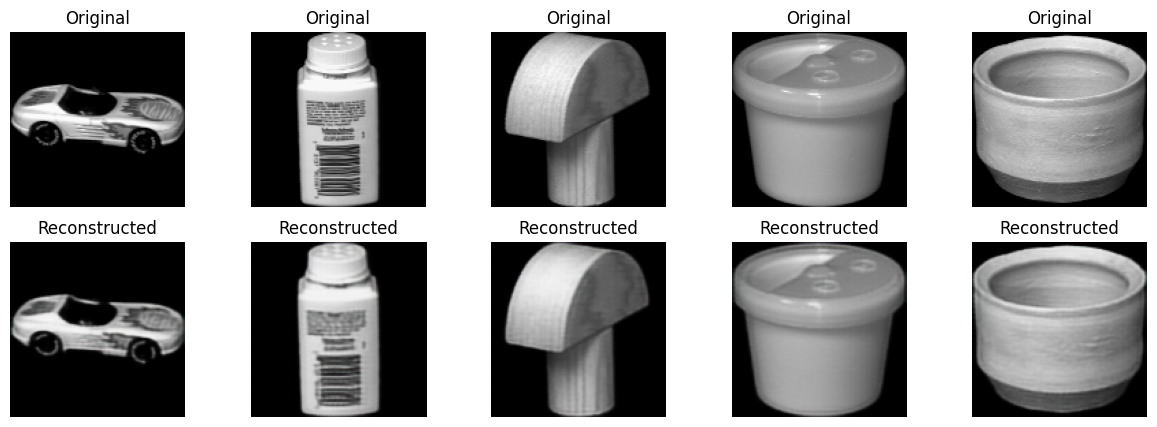

In [ ]:
# Evaluate on the test set
test_loss = autoencoder.evaluate(test_images, test_images, verbose=1)
print(f"Final Test MSE: {test_loss}")

# Visualize original and reconstructed images
def plot_reconstructed_images(original, reconstructed, num_images=5):
    plt.figure(figsize=(15, 5))
    for i in range(num_images):
        # Original image
        plt.subplot(2, num_images, i + 1)
        plt.imshow(original[i])
        plt.title("Original")
        plt.axis("off")

        # Reconstructed image
        plt.subplot(2, num_images, i + 1 + num_images)
        plt.imshow(reconstructed[i])
        plt.title("Reconstructed")
        plt.axis("off")
    plt.show()

# Predict using the autoencoder
reconstructed_images = autoencoder.predict(test_images)

# Visualize original vs reconstructed
plot_reconstructed_images(test_images, reconstructed_images)


**Final Test MSE:** The model achieved a very low reconstruction error (0.0005057), demonstrating strong performance on unseen data.

**Reconstruction Quality:**

- The reconstructed images closely resemble the originals.
- This indicates the autoencoder effectively learned key features for image compression and reconstruction.

**Visual Analysis:**

- Details and shapes are well preserved, even for complex structures.
- Minor differences may exist, but the model successfully captures essential features.

This validates the autoencoder's ability to generalize and accurately reconstruct from the latent representation.

In [ ]:
import tensorflow.keras.backend as K

def calculate_psnr(original, reconstructed):
    mse = K.mean(K.square(original - reconstructed))
    psnr = 20 * K.log(1.0 / K.sqrt(mse)) / K.log(10.0)
    return psnr

psnr = calculate_psnr(test_images, reconstructed_images)
print(f"PSNR: {K.eval(psnr):.2f} dB")


PSNR: 32.96 dB


**PSNR Value:** The Peak Signal-to-Noise Ratio (PSNR) is 32.96 dB. This indicates good reconstruction quality since PSNR values above 30 dB typically reflect minimal distortion between original and reconstructed images.

**Significance:**

- Higher PSNR means the reconstructed images are very close to the originals.
- The result shows the autoencoder effectively minimizes noise and preserves image details.

This confirms the model's strong performance in reconstructing the test images with high fidelity.

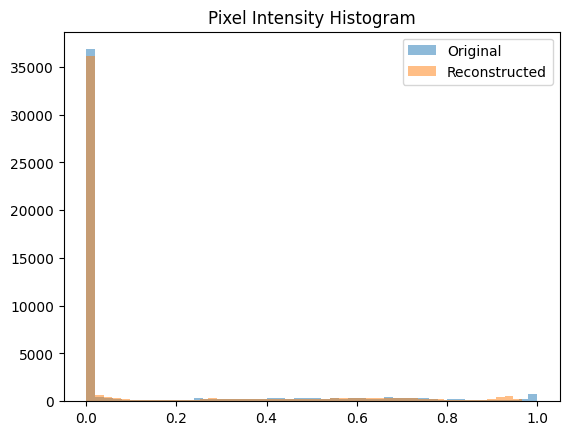

In [ ]:
def plot_histogram_comparison(original, reconstructed):
    orig_pixels = original.flatten()
    recon_pixels = reconstructed.flatten()

    plt.hist(orig_pixels, bins=50, alpha=0.5, label='Original')
    plt.hist(recon_pixels, bins=50, alpha=0.5, label='Reconstructed')
    plt.legend(loc='upper right')
    plt.title("Pixel Intensity Histogram")
    plt.show()

plot_histogram_comparison(test_images[0], reconstructed_images[0])


**Interpretation:**

The Pixel Intensity Histogram compares the distribution of pixel values in the original and reconstructed images.

**Observation:**

- The histograms for the original and reconstructed images overlap significantly.
- This indicates that the pixel intensities in the reconstructed images closely match those in the originals.

**Significance:**

- A high overlap suggests that the autoencoder successfully preserves the overall structure and intensity distribution of the original images.
- Any deviations are minimal, confirming the quality of reconstruction.

This further validates the effectiveness of the autoencoder in reconstructing images with high accuracy.

# SUMMARY:

1. **Loss Performance**: Training and validation losses converge quickly, with minimal overfitting, indicating stable training.  
2. **MSE**: Final test MSE of 0.000505 shows accurate reconstruction.  
3. **PSNR**: A PSNR of 32.96 dB confirms high-quality image reconstruction.  
4. **Visual Comparison**: Reconstructed images closely resemble the original ones, validating the model's effectiveness.  
5. **Pixel Intensity**: Overlapping histograms show the autoencoder preserves pixel intensity distributions well.  
6. **Overall**: The autoencoder successfully captures and reconstructs key image features with high fidelity.  